#**README**#

O Treinamento de Python é um projeto desenvolvido pelo Laboratório de
Instrumentação Eletrônica e Controle (LIEC) e pelo Programa de Educação Tutorial
de Engenharia Elétrica da Universidade Federal de Campina Grande (PET Elétrica -
UFCG), que tem como objetivo principal, durante a sua execução, desenvolver
habilidades relacionadas a linguagem de programação Python, com foco em
aplicações para engenheiros e para cientistas.

Todo conteúdo produzido neste notebook foi adaptado por Rafael dos Santos Lima e por Tâmara Ruth Dantas dos Santos. Algumas sintaxes foram revisadas com auxilio da documentação do SymPy (https://docs.sympy.org/latest/tutorial/index.html).

---

Para mais informações e/ou sanar eventuais dúvidas, entrar em contato com:
*   Rafael - rafaelsantos.lima@ee.ufcg.edu.br
*   Tâmara - tamara.santos@ee.ufcg.edu.br

#**SymPy**

**SymPy** é uma biblioteca Python para matemática simbólica. Ele tem como objetivo se tornar um sistema de álgebra computacional (CAS) completo, mantendo o código o mais simples possível para ser compreensível e facilmente extensível.

Algumas funcionalidades são:

* Trabalhar com matrizes
* Realizar cálculo de limites, derivadas, integrais, etc.
* Utilizar solvers

> **Importando a biblioteca:**

In [ ]:
from sympy import *

## **Introdução**

### **O que é computação simbólica?**



A computação simbólica lida com a computação de objetos matemáticos simbolicamente. Isso significa que os objetos matemáticos são representados exatamente, não aproximadamente, e as expressões matemáticas com variáveis ​​não avaliadas são deixadas na forma simbólica.

No SymPy, as variáveis ​​são definidas usando symbols. Ao contrário de muitos sistemas de manipulação simbólica, **as variáveis ​​no SymPy devem ser definidas antes de serem usadas**, já que elas não são definidas automaticamente.

Vamos definir uma expressão simbólica, representando a expressão matemática x+2y:

In [ ]:
x, y = symbols('x y')
expr = x + 2*y
expr

Observe que escrevemos **x + 2 * y** exatamente como faríamos se **x** e **y** fossem variáveis comuns do Python. Mas, neste caso, em vez de avaliar para algo, a expressão permanece apenas **x + 2 * y**. Agora vamos brincar com isso:

In [ ]:
expr - x

In [ ]:
expr + 1

## **Cálculo**

Esta seção abrange como fazer tarefas básicas de cálculo.

- Derivada `diff(função,variável)`

- Integral `integrate(função,(variável,início,fim))`

- Limites `limit(função, variável, x0)`

- Outras funções disponíveis são:  expansão de séries, diferenças finitas.

- Para mais informações acesse: https://docs.sympy.org/latest/tutorial/calculus.html

In [ ]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True) # Para imprimir os caracteres unicode 

### **Derivadas**

Para derivar, use a função `.diff(função,variável)`

In [ ]:
diff(cos(x), x)

In [ ]:
diff(exp(x**2), x)

.`diff` pode tomar vários derivativos ao mesmo tempo. ***Para tomar vários derivativos, passe a variável quantas vezes desejar diferenciar ou passar um número após a variável***:

In [ ]:
diff(x**4, x, x, x)

In [ ]:
diff(x**4, x, 3)

Você também pode tomar derivativos em relação a muitas variáveis ao mesmo tempo. Basta passar cada derivada em ordem, usando a mesma sintaxe que para derivativos de variável única. Por exemplo, cada um dos seguintes calculará:


```
      ∂7
____________ e^(xyz)
∂x ∂y^2 ∂z^4  
```

In [ ]:
expr = exp(x*y*z)

In [ ]:
diff(expr, x, y, y, z, z, z, z)

In [ ]:
diff(expr, x, y, 2, z, 4)

Para criar uma derivada sem avaliação, use a classe Derivative. Tem a mesma sintaxe que  .diff

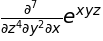

In [ ]:
deriv = Derivative(expr, x, y, 2, z, 4)
deriv

Usando o método `doit()` no módulo sympy, podemos avaliá-la.



In [ ]:
deriv.doit()

Esses objetos não avaliados são úteis para atrasar a avaliação da derivada, ou para fins de impressão. Eles também são usados quando o SymPy não sabe como calcular o derivado de uma expressão (por exemplo, se ele contém uma função indefinida).

###**Integrais**

Para calcular uma integral, use a função `integrate(função,(variável,início,fim))`. Existem dois tipos de integrais, definitivas e indefinidas. Para calcular uma integral indefinida, **basta passar apenas a variável após a função** 

*Observe que o SymPy não inclui a constante de integração. Se você quiser, você pode adicionar um você mesmo

In [ ]:
integrate(cos(x), x) 

Se quisermos adicionar uma constante, podemos fazer isso:

In [ ]:
k = symbols('k')
integral2 = integrate(cos(x), x) 
integral2 += k  #adicionando a constante k 
integral2

Para calcular uma integral definitiva, passe o argumento. Por exemplo, para calcular(Variavel, limite_inf, limite_sup)

In [ ]:
integrate(exp(-x), (x, 0, oo))

Como acontece com as integrais indefinidas, você pode passar várias tuplas limite para executar uma integral múltipla. Por exemplo, para calcular: 

`∫-∞ ∞ ∫-∞ ∞ (e^(−x^2 − y^2)) dx dy`

In [ ]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

Se `integrate` não for capaz de calcular uma integral, ela retornará um objeto Integral não avaliado.

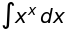

In [ ]:
expr = integrate(x**x, x) #É uma função não integrável
expr

Tal como acontece com `Derivative`, você pode criar uma integral não avaliada usando `Integral`. Para avaliar posteriormente essa integral, chame `doit()`.

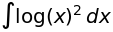

In [ ]:
expr = Integral(log(x)**2, x)
expr

In [ ]:
expr.doit()

In [ ]:
expr2 = integrate(log(x)**2, x)
expr2

###**Limites**

O SymPy pode calcular limites simbólicos com a função `limit`.

In [ ]:
limit(sin(x)/x, x, 0)

In [ ]:
expr = x**2/exp(x)
limit(expr, x, oo)

Como Derivativo e Integral, o limite tem uma contraparte não avaliada. Para avaliá-lo, use o doit.

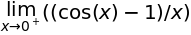

In [ ]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr  

In [ ]:
expr.doit()

Para avaliar um limite em apenas um lado, passe `'+'` ou `'-'` como um quarto argumento para `limit`. Por exemplo, para calcular

In [ ]:
limit(1/x, x, 0, '+')

##**Matrizes**

Para fazer uma matriz em SymPy, use o objeto. Uma matriz é construída fornecendo uma lista de vetores de linha que compõem a matriz. Por exemplo, para construir a matriz `Matrix`



In [ ]:
Matrix([[1, -1], [3, 4], [0, 2]])

Matrix([
[1, -1],
[3,  4],
[0,  2]])

As matrizes são manipuladas como qualquer outro objeto em SymPy ou Python.



In [ ]:
N = Matrix([0, 1, 1])
N

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

In [ ]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
# print(M.shape)
# print(N.shape)
M * N

⎡5⎤
⎢ ⎥
⎣3⎦

Uma coisa importante a se notar sobre as matrizes SymPy é que, ao contrário de todos os outros objetos no SymPy, elas são mutáveis. Isso significa que eles podem ser modificados no local, como veremos a seguir. A desvantagem disso é que o `Matrix` não pode ser usado em lugares que exigem imutabilidade, como dentro de outras expressões SymPy ou como chaves para dicionários. Se você precisar de uma versão imutável do `Matrix`, use `ImmutableMatrix`.

###**Operações Básicas**

Aqui estão algumas operações básicas em .`Matrix`





***Acessando linhas e colunas:***

Para obter uma linha ou coluna individual de uma matriz, use row ou col. Por exemplo, M.row (0) obterá a primeira linha. M.col (-1) obterá a última coluna.

In [ ]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M

Matrix([
[ 1, 2, 3],
[-2, 0, 4]])

In [ ]:
M.row(0)

Matrix([[1, 2, 3]])

In [ ]:
M.col(-1)

Matrix([
[3],
[4]])

***Excluindo e inserindo linhas e colunas***

Para excluir uma linha ou coluna, use `row_del` ou `col_del`. Essas operações modificarão a Matriz no local.

In [ ]:
M.col_del(0)
M

Matrix([
[2, 3],
[0, 4]])

In [ ]:
M.row_del(1)
M

Matrix([[2, 3]])

Para inserir linhas ou colunas, use `row_insert` ou `col_insert`. Essas operações não funcionam no local.

In [ ]:
M

Matrix([[2, 3]])

In [ ]:
M = M.row_insert(1, Matrix([[0, 4]]))
M

Matrix([
[2, 3],
[0, 4]])

In [ ]:
M = M.col_insert(0, Matrix([1, -2]))
M

Matrix([
[ 1, 2, 3],
[-2, 0, 4]])

A menos que explicitamente declarado, os métodos mencionados abaixo não funcionam no local. Em geral, um método que não opera no local retornará uma nova `Matrix` e um método que opera no local retornará `Nome`.

***Métodos Básicos***

Conforme observado acima, operações simples como adição e multiplicação são feitas apenas usando `+`, `*` e `**`. Para encontrar o inverso de uma matriz, apenas eleve-a à potência `-1`.

In [ ]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])

In [ ]:
M + N

Matrix([
[ 1,  6],
[-2, 10]])

In [ ]:
M*N

Matrix([
[0, 24],
[0, 15]])

In [ ]:
M**2

Matrix([
[-5, 12],
[-8,  3]])

In [ ]:
#NonInvertibleMatrixError: Matrix det == 0; não invertível.
N ** -1

Para tomar a **transposição** de uma Matriz, use `.T`



In [ ]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
M

Matrix([
[1, 2, 3],
[4, 5, 6]])

In [ ]:
M.T

Matrix([
[1, 4],
[2, 5],
[3, 6]])

***Construtores matriciais***

Existem vários construtores para criar matrizes comuns. Para criar uma ***matriz identidade***, use o `eye`. `eye`(n) criará um

In [ ]:
eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Para criar uma **matriz de zeros**, use `zeros`. `zeros(n, m)` cria uma matriz n × m de 0s.

In [ ]:
zeros(2,4)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0]])

Da mesma forma, pode-se criar uma matriz de `ones`

In [ ]:
ones(2,4)

Matrix([
[1, 1, 1, 1],
[1, 1, 1, 1]])

Para criar ***matrizes diagonais***, use `diag`. Os argumentos para `diag` podem ser números ou matrizes. Um número é interpretado como uma matriz 1 × 1. As matrizes são empilhadas diagonalmente. Os elementos restantes são preenchidos com 0s.

In [ ]:
diag(1, 2, 3)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [ ]:
diag(-1, ones(2, 2), Matrix([5, 7, 5]))

Matrix([
[-1, 0, 0, 0],
[ 0, 1, 1, 0],
[ 0, 1, 1, 0],
[ 0, 0, 0, 5],
[ 0, 0, 0, 7],
[ 0, 0, 0, 5]])

###**Métodos Avançados**

***Determinante***

Para calcular o determinante de uma matriz, use `.det`

In [ ]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M

Matrix([
[1,  0, 1],
[2, -1, 3],
[4,  3, 2]])

In [ ]:
M.det()

-1

***Matriz escalonada***

Para colocar uma matriz na forma escalonada de linha reduzida, use `rref`. `rref` retorna uma tupla de dois elementos. A primeira é a forma escalonada de linha reduzida e a segunda é uma tupla de índices das colunas pivô.

In [ ]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
M

Matrix([
[ 1,  0,  1,  3],
[ 2,  3,  4,  7],
[-1, -3, -3, -4]])

In [ ]:
M.rref()

(Matrix([
 [1, 0,   1,   3],
 [0, 1, 2/3, 1/3],
 [0, 0,   0,   0]]), (0, 1))

***Espaço nulo***

Para encontrar o espaço nulo de uma matriz, use o `nullspace`. `nullspace` retorna uma `lista` de vetores de coluna que abrangem o espaço nulo da matriz.

In [ ]:
M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
M

Matrix([
[1,  2, 3, 0, 0],
[4, 10, 0, 0, 1]])

In [ ]:
M.nullspace()

[Matrix([
 [-15],
 [  6],
 [  1],
 [  0],
 [  0]]), Matrix([
 [0],
 [0],
 [0],
 [1],
 [0]]), Matrix([
 [   1],
 [-1/2],
 [   0],
 [   0],
 [   1]])]

***Espaço Coluna***

Para encontrar o espaço da coluna de uma matriz, use o `columnspace`. `columnpace` retorna uma lista de vetores de coluna que abrangem o espaço de colunas da matriz.

In [ ]:
M = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])
M

Matrix([
[1, 1, 2],
[2, 1, 3],
[3, 1, 4]])

In [ ]:
M.columnspace()

[Matrix([
 [1],
 [2],
 [3]]), Matrix([
 [1],
 [1],
 [1]])]

***Autovalores, Autovetores e Diagonalização***

Para encontrar os autovalores de uma matriz, use `eigenvals`. `eigenvals` retorna um dicionário de `autovalor: multiplicidade_algébrica` (similar à saída de raízes).

In [ ]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [ ]:
M.eigenvals()

{-2: 1, 3: 1, 5: 2}

Isso significa que M tem autovalores -2, 3 e 5, e que os autovalores -2 e 3 têm multiplicidade algébrica 1 e que o autovalor 5 tem multiplicidade algébrica 2.

Para encontrar os autovetores de uma matriz, use os `eigenvects`. eigenvects retorna uma lista de tuplas da forma  `(autovalor, multiplicidade_algébrica, [autovetores])`.

In [ ]:
M.eigenvects()

[(-2, 1, [Matrix([
   [0],
   [1],
   [1],
   [1]])]), (3, 1, [Matrix([
   [1],
   [1],
   [1],
   [1]])]), (5, 2, [Matrix([
   [1],
   [1],
   [1],
   [0]]), Matrix([
   [ 0],
   [-1],
   [ 0],
   [ 1]])])]

Isso nos mostra que, por exemplo, o autovalor 5 também possui multiplicidade geométrica 2, pois possui dois autovetores. Como as multiplicidades algébrica e geométrica são iguais para todos os autovalores, M é diagonalizável.

Para diagonalizar uma matriz, use `diagonalize`. `diagonalize` retorna uma tupla (P, D), onde D é diagonal e M = PDP ^ (−1).

In [ ]:
M

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [ ]:
P, D = M.diagonalize()

In [ ]:
P

⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

In [ ]:
D

⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦

In [ ]:
P*D*P**-1

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

In [ ]:
P*D*P**-1 == M

True

Observe que, uma vez que os autovetores também incluem os autovalores, você deve usá-los em vez dos autovalores se também quiser os autovetores. No entanto, como calcular os autovetores muitas vezes pode ser caro, os autovalores devem ser preferidos se você deseja apenas encontrar os autovalores.

Se tudo o que você deseja é o polinômio característico, use `charpoly`. Isso é mais eficiente do que `eigenvals`, porque às vezes as raízes simbólicas podem ser caras para calcular.

In [ ]:
lamda = symbols('lamda')
p = M.charpoly(lamda)
factor(p.as_expr())

(lamda - 5)**2*(lamda - 3)*(lamda + 2)

##**Solvers**

In [ ]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

###***Uma nota sobre equações:*** 

As equações simbólicas em SymPy não são representadas por `=` ou `==`, mas por `.Eq`

In [ ]:
Eq(x, y)

No entanto, existe uma maneira ainda mais fácil. No SymPy, qualquer expressão que não esteja em uma `Eq` é automaticamente considerada igual a 0 pelas funções de resolução. Como ***a = b*** se e somente se ***a − b = 0***, isso significa que em vez de usar `x == y`, você pode apenas usar `x - y`. Por exemplo

In [ ]:
solveset(x**2 - 1, x)

In [ ]:
solveset(Eq(x**2, 1), x)

Isso é particularmente útil se a equação que você deseja resolver já é igual a 0. Em vez de digitar `solveset (Eq (expr, 0), x)`, você pode apenas usar `solveset (expr, x)`.

###**Resolvendo Equações Algebricamente:**

A principal função para resolver equações algébrias é `solveset`. A sintaxe para solveset é `solveset(equation, variable=None, domain=S.Complexes)`. Onde `equations` pode estar na forma de `Eq` instâncias ou expressões que se supõe ser igual a zero.

***Nota:*** Há outra função chamada `solve` que também pode ser usada para resolver equações. A sintaxe é `solve(equations, variables)` No entanto, recomenda-se usar `solveset` em vez disso.

In [ ]:
solveset(x**2 - x, x)

In [ ]:
solveset(x - x , x, domain=S.Reals)

In [ ]:
solveset(sin(x) - 1, x, domain=S.Reals)

Se não houver soluções, um `EmptySet` será retornado e se não for capaz de encontrar soluções, um `ConditionSet` será retornado.

In [ ]:
solveset(exp(x), x)  #Não existe solução

In [ ]:
solveset(cos(x) - x, x)  #Não foi possível encontrar solução

No módulo `solveset`, o sistema linear de equações é resolvido usando `linsolve((A, b), (x,y,z)`.

Onde A é a matriz e b é o vetor de resultado

* Forma de Equações:



In [ ]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

* Forma de matriz aumentada:



In [ ]:
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

No módulo `solveset`, o sistema não linear de equações é resolvido usando `nonlinsolve(equation, variable)`. A seguir estão exemplos de `nonlinsolve`.



1.   Quando apenas a solução real está presente:



In [ ]:
a, b, c, d = symbols('a, b, c, d', real=True)
nonlinsolve([a**2 + a, a - b], [a, b])

In [ ]:
nonlinsolve([x*y - 1, x - 2], x, y)


2.   Quando apenas uma solução complexa está presente:





In [ ]:
nonlinsolve([x**2 + 1, y**2 + 1], [x, y])



3.   Quando ambas as soluções reais e complexas estiverem presentes:



In [ ]:
system = [x**2 - 2*y**2 -2, x*y - 2]
vars = [x, y]
nonlinsolve(system, vars)

In [ ]:
system = [exp(x) - sin(y), 1/y - 3]
nonlinsolve(system, vars)

Para resolver **equações diferenciais**, use `dsolve`. Primeiro, crie uma função indefinida passando `cls = Function` para a função de símbolos.

In [ ]:
f, g = symbols('f g', cls=Function)

`f` e `g` agora são funções indefinidas. Podemos chamar `f (x)`, e isso representará uma função desconhecida.

In [ ]:
f(x)

Os derivados de `f (x)` não são avaliados.

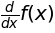

In [ ]:
f(x).diff(x)

Para representar a equação diferencial, usaríamos assim `f′′(x)−2f′(x)+f(x)=sin(x)`

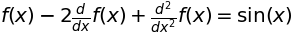

In [ ]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

Para resolver o EDO, passe-o e a função para resolver para `.dsolve`



In [ ]:
dsolve(diffeq, f(x))

`dsolve` retorna uma instância da `Eq`. Isso ocorre porque, em geral, as soluções para equações diferenciais não podem ser resolvidas explicitamente para a função.

In [ ]:
dsolve(f(x).diff(x)*(1 - sin(f(x))) - 1, f(x))

As constantes arbitrárias nas soluções de dsolve são símbolos da forma C1, C2, C3 e assim por diante.